In [2]:
#情景，冲突，问题，回答

In [3]:
"""
影响索赔失败的原因:
    1.地区
        (1)年/月收入
    2.身体状态
        (1)年龄
    3.保险种类
        (1)保险赔付费
"""

'\n影响索赔失败的原因:\n    1.地区\n        (1)年/月收入\n    2.身体状态\n        (1)年龄\n    3.保险种类\n        (1)保险赔付费\n'

In [4]:
#分析一个单号是否进行多次理赔
#单号分布的地区
#年龄段(以10为单位进行统计)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
bxlp = pd.read_excel('bxlp.xlsx')
data = np.load('bxlp.xlsx', encoding='ASCII', allow_pickle=True)
bxlp.head()
#数据库的导入

,性别,姓名,年龄,地区,保险理赔日期,月收入,年收入,电话号码,身体状态,保险单号,理赔状态,索赔失败原因,保险赔付费,保险种类
0,女,钱予舴,70,甘肃省,2012-02-22,5965,82506,18372450095,健康,2012022229543603359813,成功,NaN,13346,财产损失险
1,女,钱予舴,70,甘肃省,2012-02-22,5965,82506,18372450095,健康,2012022229543603359813,成功,NaN,13346,财产损失险
2,女,赵予舴,44,天津市,2012-06-08,624,17884,18396080321,健康,2012060888390405291041,成功,NaN,29473,失业保险
3,男,王方洲,56,海南省,2012-05-03,3783,69203,18335096429,健康,2012050321694986948299,成功,NaN,2228,失业保险
4,女,周小玉,54,宁夏回族自治区,2013-04-24,1605,41898,18316536737,健康,2013042476693801642365,成功,NaN,53371,生育保险


In [7]:
bxlp.info()
#数据表,2257为申请理赔失败人数

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   性别      3715 non-null   object
 1   姓名      3715 non-null   object
 2   年龄      3715 non-null   int64 
 3   地区      3715 non-null   object
 4   保险理赔日期  3715 non-null   object
 5   月收入     3715 non-null   int64 
 6   年收入     3715 non-null   int64 
 7   电话号码    3715 non-null   int64 
 8   身体状态    3715 non-null   object
 9   保险单号    3715 non-null   object
 10  理赔状态    3715 non-null   object
 11  索赔失败原因  2257 non-null   object
 12  保险赔付费   3715 non-null   int64 
 13  保险种类    3715 non-null   object
dtypes: int64(5), object(9)
memory usage: 406.5+ KB


In [8]:
bxlp.isnull().sum()
#1458为成功申请理赔的人数。

性别           0
姓名           0
年龄           0
地区           0
保险理赔日期       0
月收入          0
年收入          0
电话号码         0
身体状态         0
保险单号         0
理赔状态         0
索赔失败原因    1458
保险赔付费        0
保险种类         0
dtype: int64

In [9]:
#以单号为主的去重
dh_bxlp=bxlp.drop_duplicates(keep='first', subset=['保险单号'])
dh_bxlp

,性别,姓名,年龄,地区,保险理赔日期,月收入,年收入,电话号码,身体状态,保险单号,理赔状态,索赔失败原因,保险赔付费,保险种类
0,女,钱予舴,70,甘肃省,2012-02-22,5965,82506,18372450095,健康,2012022229543603359813,成功,NaN,13346,财产损失险
2,女,赵予舴,44,天津市,2012-06-08,624,17884,18396080321,健康,2012060888390405291041,成功,NaN,29473,失业保险
3,男,王方洲,56,海南省,2012-05-03,3783,69203,18335096429,健康,2012050321694986948299,成功,NaN,2228,失业保险
4,女,周小玉,54,宁夏回族自治区,2013-04-24,1605,41898,18316536737,健康,2013042476693801642365,成功,NaN,53371,生育保险
5,女,共海蓉,46,湖北省,2012-10-13,14600,178607,18346629987,健康,2012101313490487083128,失败,客户隐瞒事实,0,失业保险
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3709,女,赵凯信,57,云南省,2012-12-28,761,26270,18345088692,疾病状态,2012122811174880469717,失败,当事人对保险的相关业务范围不了解,0,医疗保险
3710,女,韩琛青,37,江西省,2012-03-31,692,14512,18387205085,疾病状态,2012033114148089586849,失败,当事人对保险的相关业务范围不了解,0,医疗保险
3712,女,褚琬郡,41,福建省,2012-07-06,18590,248088,18307409395,健康,2012070625232260559457,失败,当事人对保险的相关业务范围不了解,0,医疗保险
3713,女,杨海蓉,36,黑龙江省,2012-11-27,13920,182557,18399108212,疾病状态,2012112723248787303522,失败,当事人对保险的相关业务范围不了解,0,医疗保险


In [10]:
bxlp.地区.value_counts()

安徽省          149
辽宁省          144
山西省          143
黑龙江省         143
新疆维吾尔族自治区    143
青海省          142
陕西省          140
贵州省          136
甘肃省          135
湖北省          135
河南省          133
吉林省          129
江西省          125
河北省          122
海南省          121
福建省          118
宁夏回族自治区      118
澳门特别行政区      117
云南省          116
北京市          115
天津市          114
山东省          114
重庆市          112
内蒙古自治区       112
江苏省          111
浙江省          109
西藏自治区        107
香港特别行政区      107
上海市          104
四川省          101
Name: 地区, dtype: int64

In [11]:
#查询重复数据

output1 = bxlp.drop_duplicates(keep=False,subset=['保险单号'])
output1.to_csv("E:\\input1.csv",encoding="utf-8-sig",index=True)
output2=bxlp
for i in range(0,len(output1)):
    output2.drop([output1.index[i]],inplace=True)
output2.to_csv("output2.csv",encoding='utf-8-sig',index=False)
output2

#结果:没有多个有效地保险理赔单号。

,性别,姓名,年龄,地区,保险理赔日期,月收入,年收入,电话号码,身体状态,保险单号,理赔状态,索赔失败原因,保险赔付费,保险种类
0,女,钱予舴,70,甘肃省,2012-02-22,5965,82506,18372450095,健康,2012022229543603359813,成功,NaN,13346,财产损失险
1,女,钱予舴,70,甘肃省,2012-02-22,5965,82506,18372450095,健康,2012022229543603359813,成功,NaN,13346,财产损失险
29,女,孙琛青,30,福建省,2012-11-25,5768,80266,18382352592,亚健康,2012112547090325729823,失败,当事人对保险的相关业务范围不了解,0,责任保险
30,女,孙琛青,30,福建省,2012-11-25,5768,80266,18382352592,亚健康,2012112547090325729823,失败,当事人对保险的相关业务范围不了解,0,责任保险
31,男,陈富明,63,江西省,2012-08-02,18524,229249,18373419370,疾病状态,2012080200859007050301,失败,当事人对保险的相关业务范围不了解,0,生育保险
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,女,王蓝,58,湖北省,2012-05-22,406,28703,18340063902,健康,2012052249853838681695,失败,当事人对保险的相关业务范围不了解,0,医疗保险
3662,女,冯海燕,34,海南省,2012-08-07,681,23736,18326082391,亚健康,2012080748464287785078,失败,客户隐瞒事实,0,生育保险
3663,女,冯海燕,34,海南省,2012-08-07,681,23736,18326082391,亚健康,2012080748464287785078,失败,客户隐瞒事实,0,生育保险
3710,女,韩琛青,37,江西省,2012-03-31,692,14512,18387205085,疾病状态,2012033114148089586849,失败,当事人对保险的相关业务范围不了解,0,医疗保险


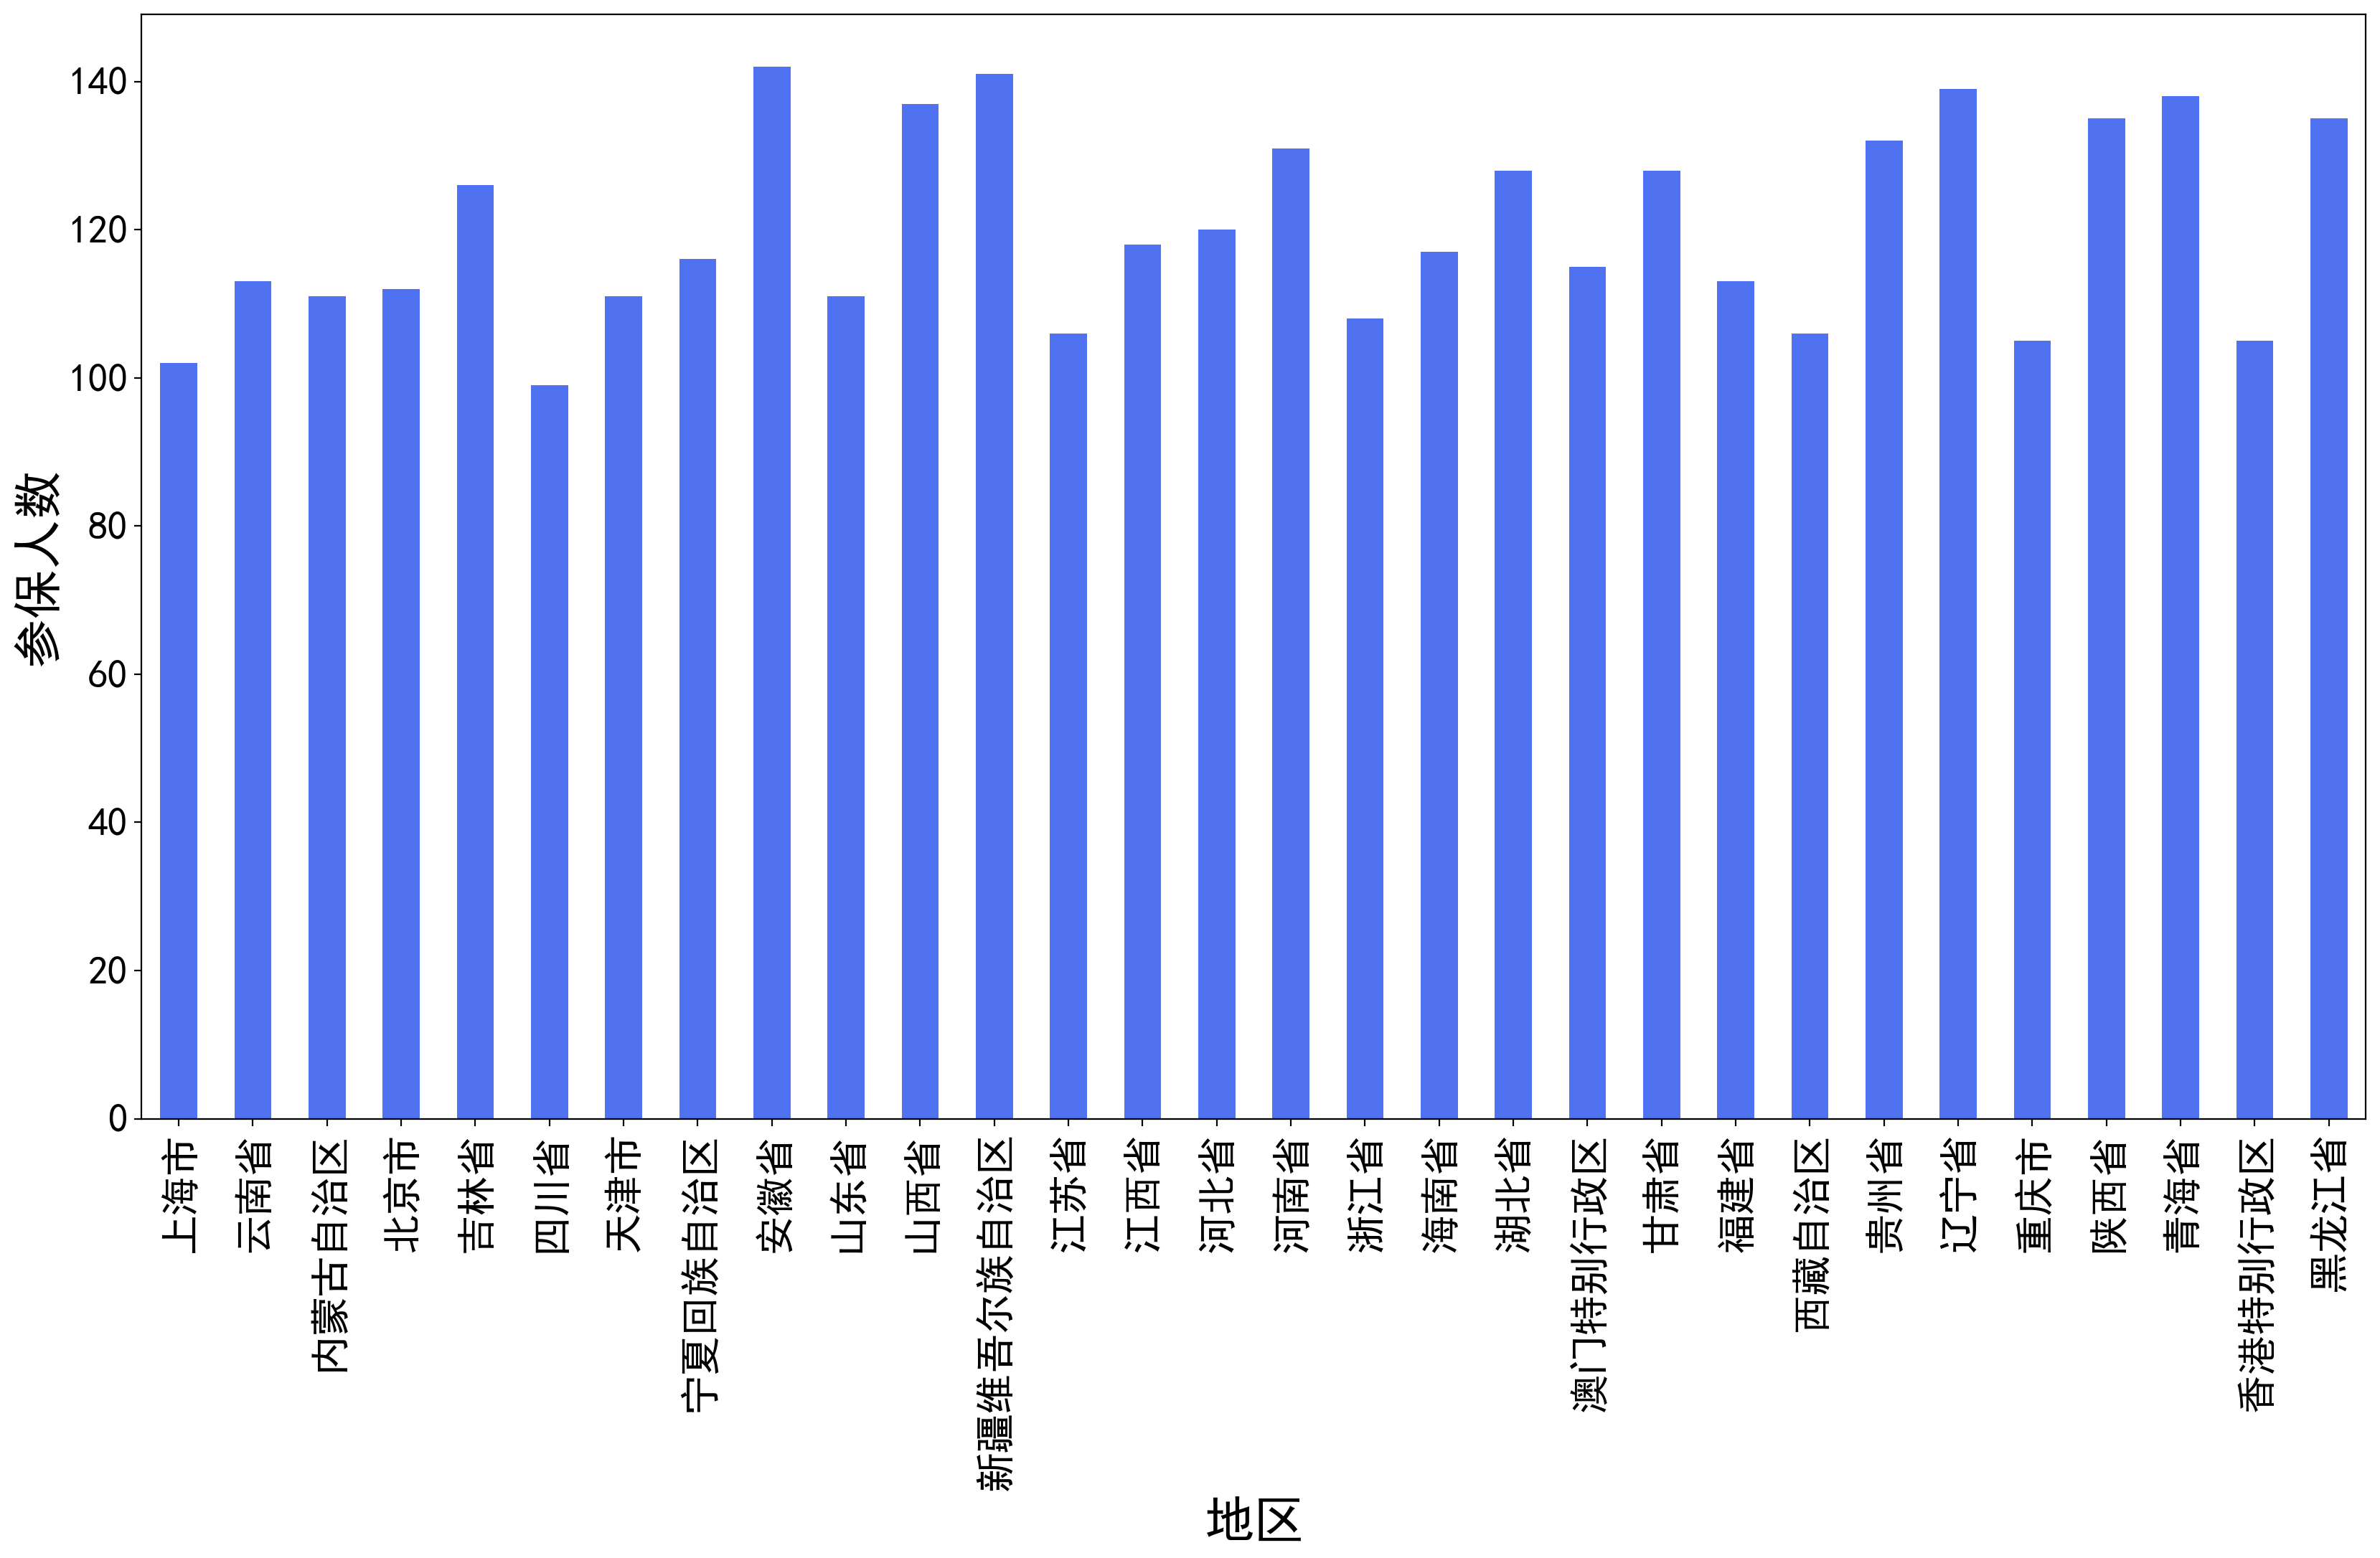

In [12]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['SimHei'] 

dh_bxlp.groupby("地区")['保险单号'].count().plot(
    kind='bar', figsize=(20, 10), color='#5172F0', fontsize=20)

plt.ylabel("参保人数",fontsize = 25)
plt.xlabel("地区",fontsize = 25)

plt.show()
#各地区的参保人数

In [13]:
num_list = [43, 0, 32, 6, 98, 5, 0]
min_num = min(filter(lambda x: x > 0, num_list))
min_num

5

In [14]:
import numpy as np
dh_bxlp[dh_bxlp.保险赔付费>0].groupby('地区')['保险赔付费'].agg([min, max, np.mean])
#各省份保险理赔的最低，高，平均费。

,min,max,mean
地区,,,
上海市,1201,78695,37892.288889
云南省,1439,75670,41852.951220
内蒙古自治区,1321,77657,37686.153846
北京市,538,79906,38406.425000
吉林省,2014,78832,42291.147541
四川省,261,78549,37743.000000
天津市,3033,77501,40304.342105
宁夏回族自治区,773,75966,37823.125000
安徽省,6507,77857,45809.807692


In [15]:
grouped = dh_bxlp[dh_bxlp.保险赔付费>0].groupby(['地区','保险种类'])

grouped["保险赔付费"].agg(['min','max'])
#各地区各保险理赔情况

min    max
地区   保险种类                
上海市  信用保证保险   2135  78695
     医疗保险     1201  68320
     失业保险    24354  66226
     工伤保险    10285  74675
     生育保险     3353  25065
...            ...    ...
黑龙江省 工伤保险     5613  78313
     括养老保险   15238  15238
     生育保险     5068  77796
     财产损失险    4245  66998
     责任保险     2493  68413

[233 rows x 2 columns]

不同种类保险的理赔次数：
 医疗保险      2007
工伤保险       437
责任保险       282
失业保险       259
生育保险       238
信用保证保险     172
财产损失险      130
括养老保险       75
Name: 保险种类, dtype: int64


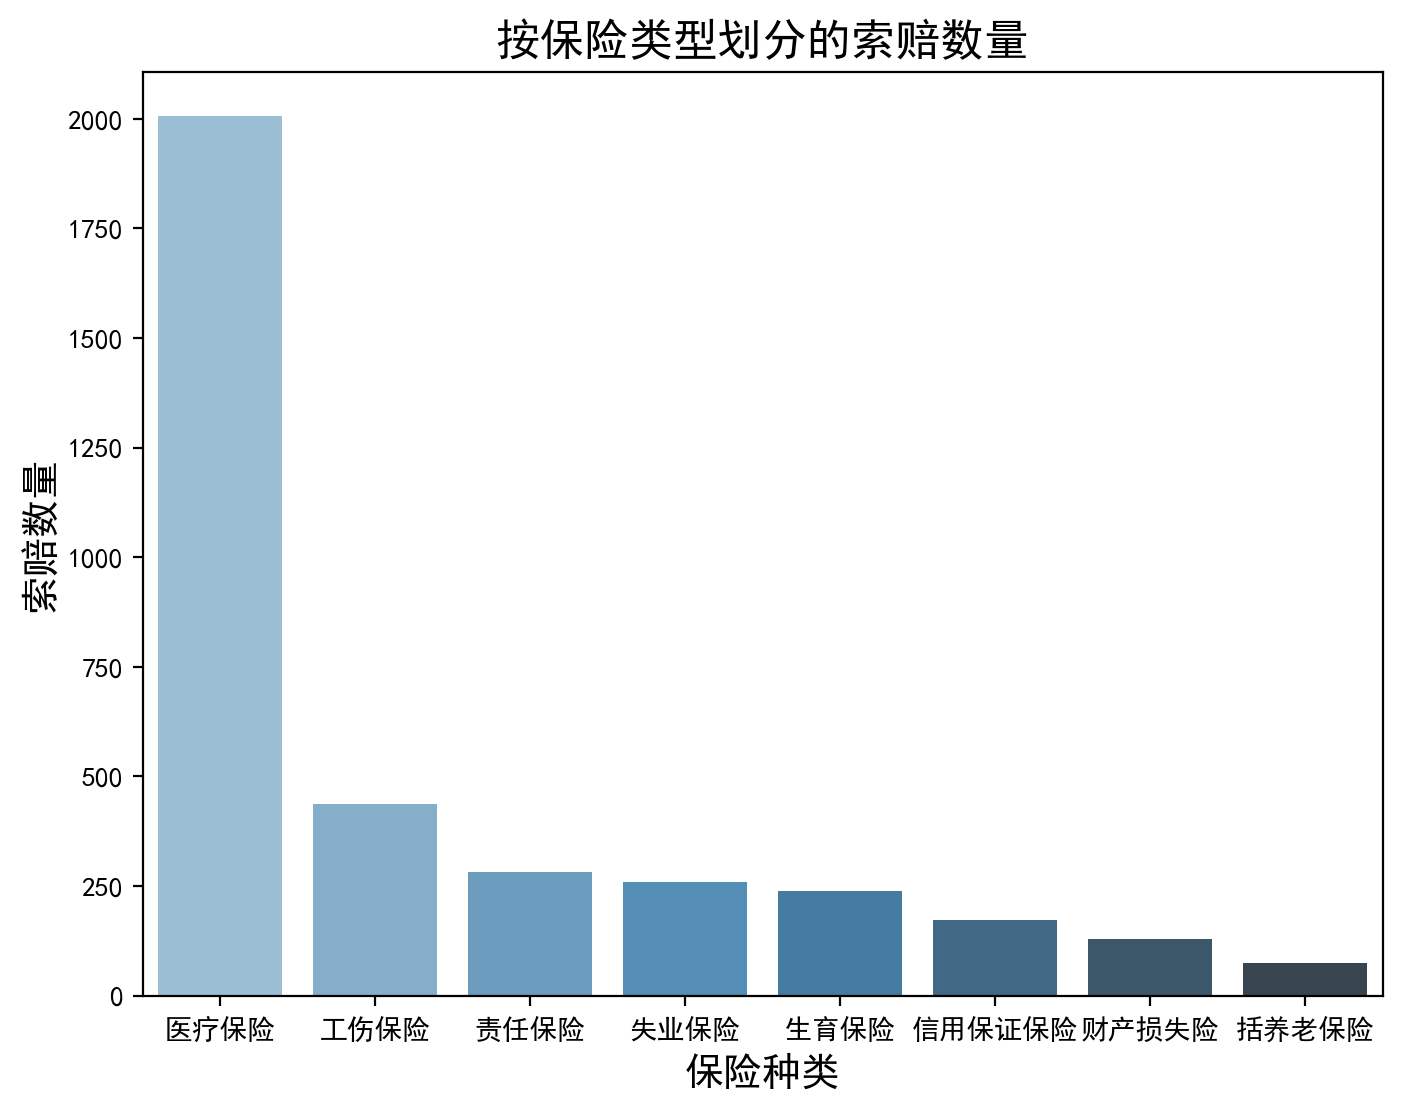

In [16]:
# 统计各种保险类型的理赔次数
claim_counts = dh_bxlp['保险种类'].value_counts()

print("不同种类保险的理赔次数：\n", claim_counts)

# 绘制柱状图
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.figure(figsize=(8,6))
sns.barplot(x=claim_counts.index, y=claim_counts.values, palette='Blues_d')
plt.title('按保险类型划分的索赔数量', fontsize=16)
plt.xlabel('保险种类', fontsize=14)
plt.ylabel('索赔数量', fontsize=14)
plt.show()

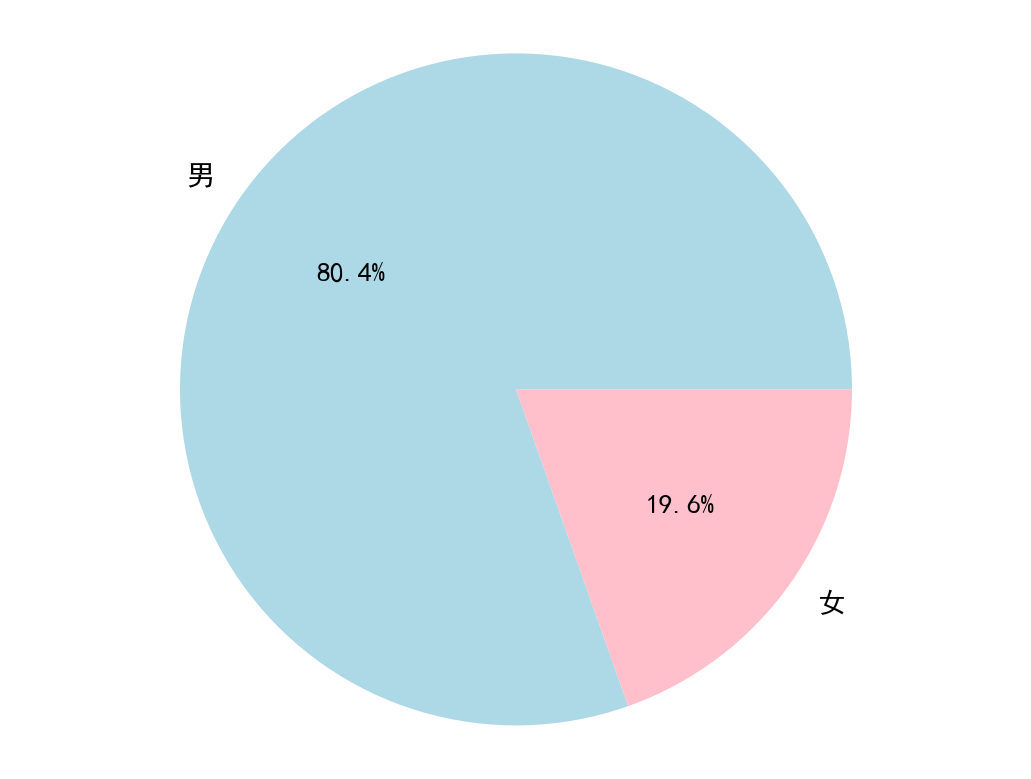

In [17]:
# 统计男女比例占比
sex_counts = dh_bxlp["性别"].value_counts(normalize=True)
male_ratio = sex_counts[0]
female_ratio = sex_counts[1]

# 绘制饼图
labels = ["男", "女"]
sizes = [male_ratio, female_ratio]
colors = ["lightblue", "pink"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


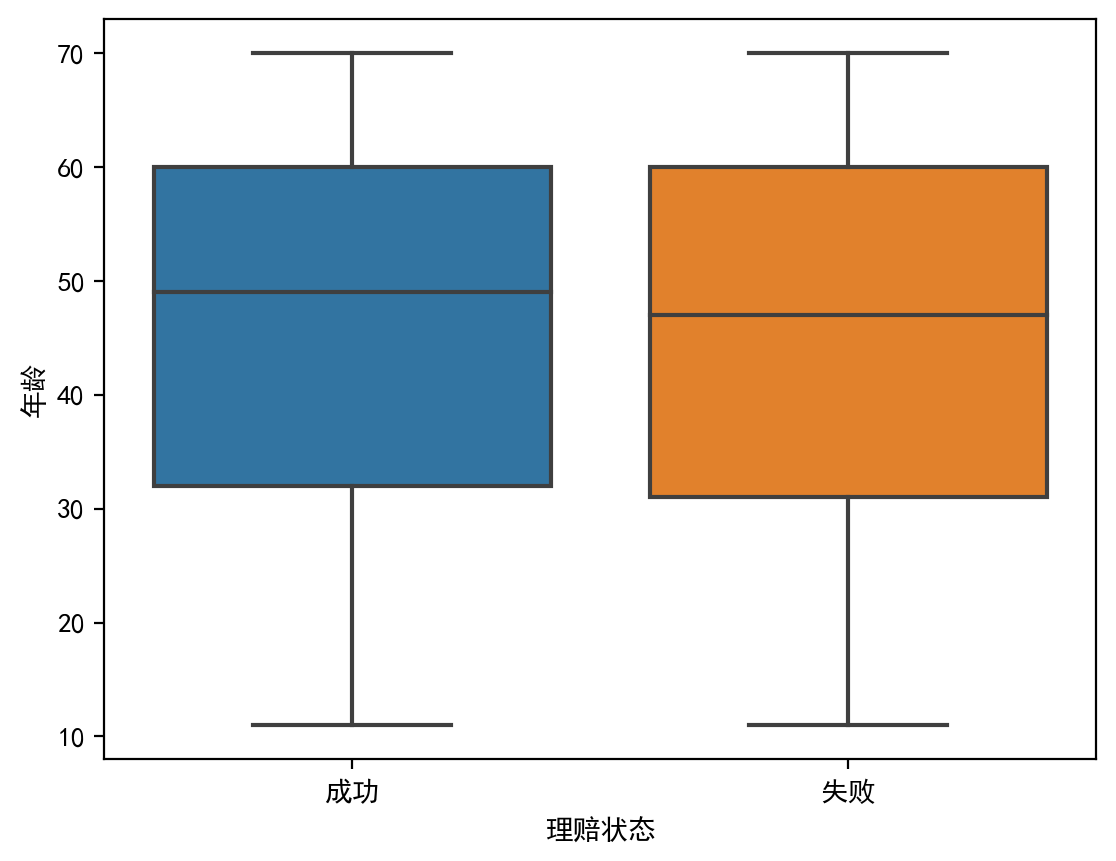

In [21]:
sns.boxplot(x='理赔状态', y='年龄', data=dh_bxlp)
plt.show()

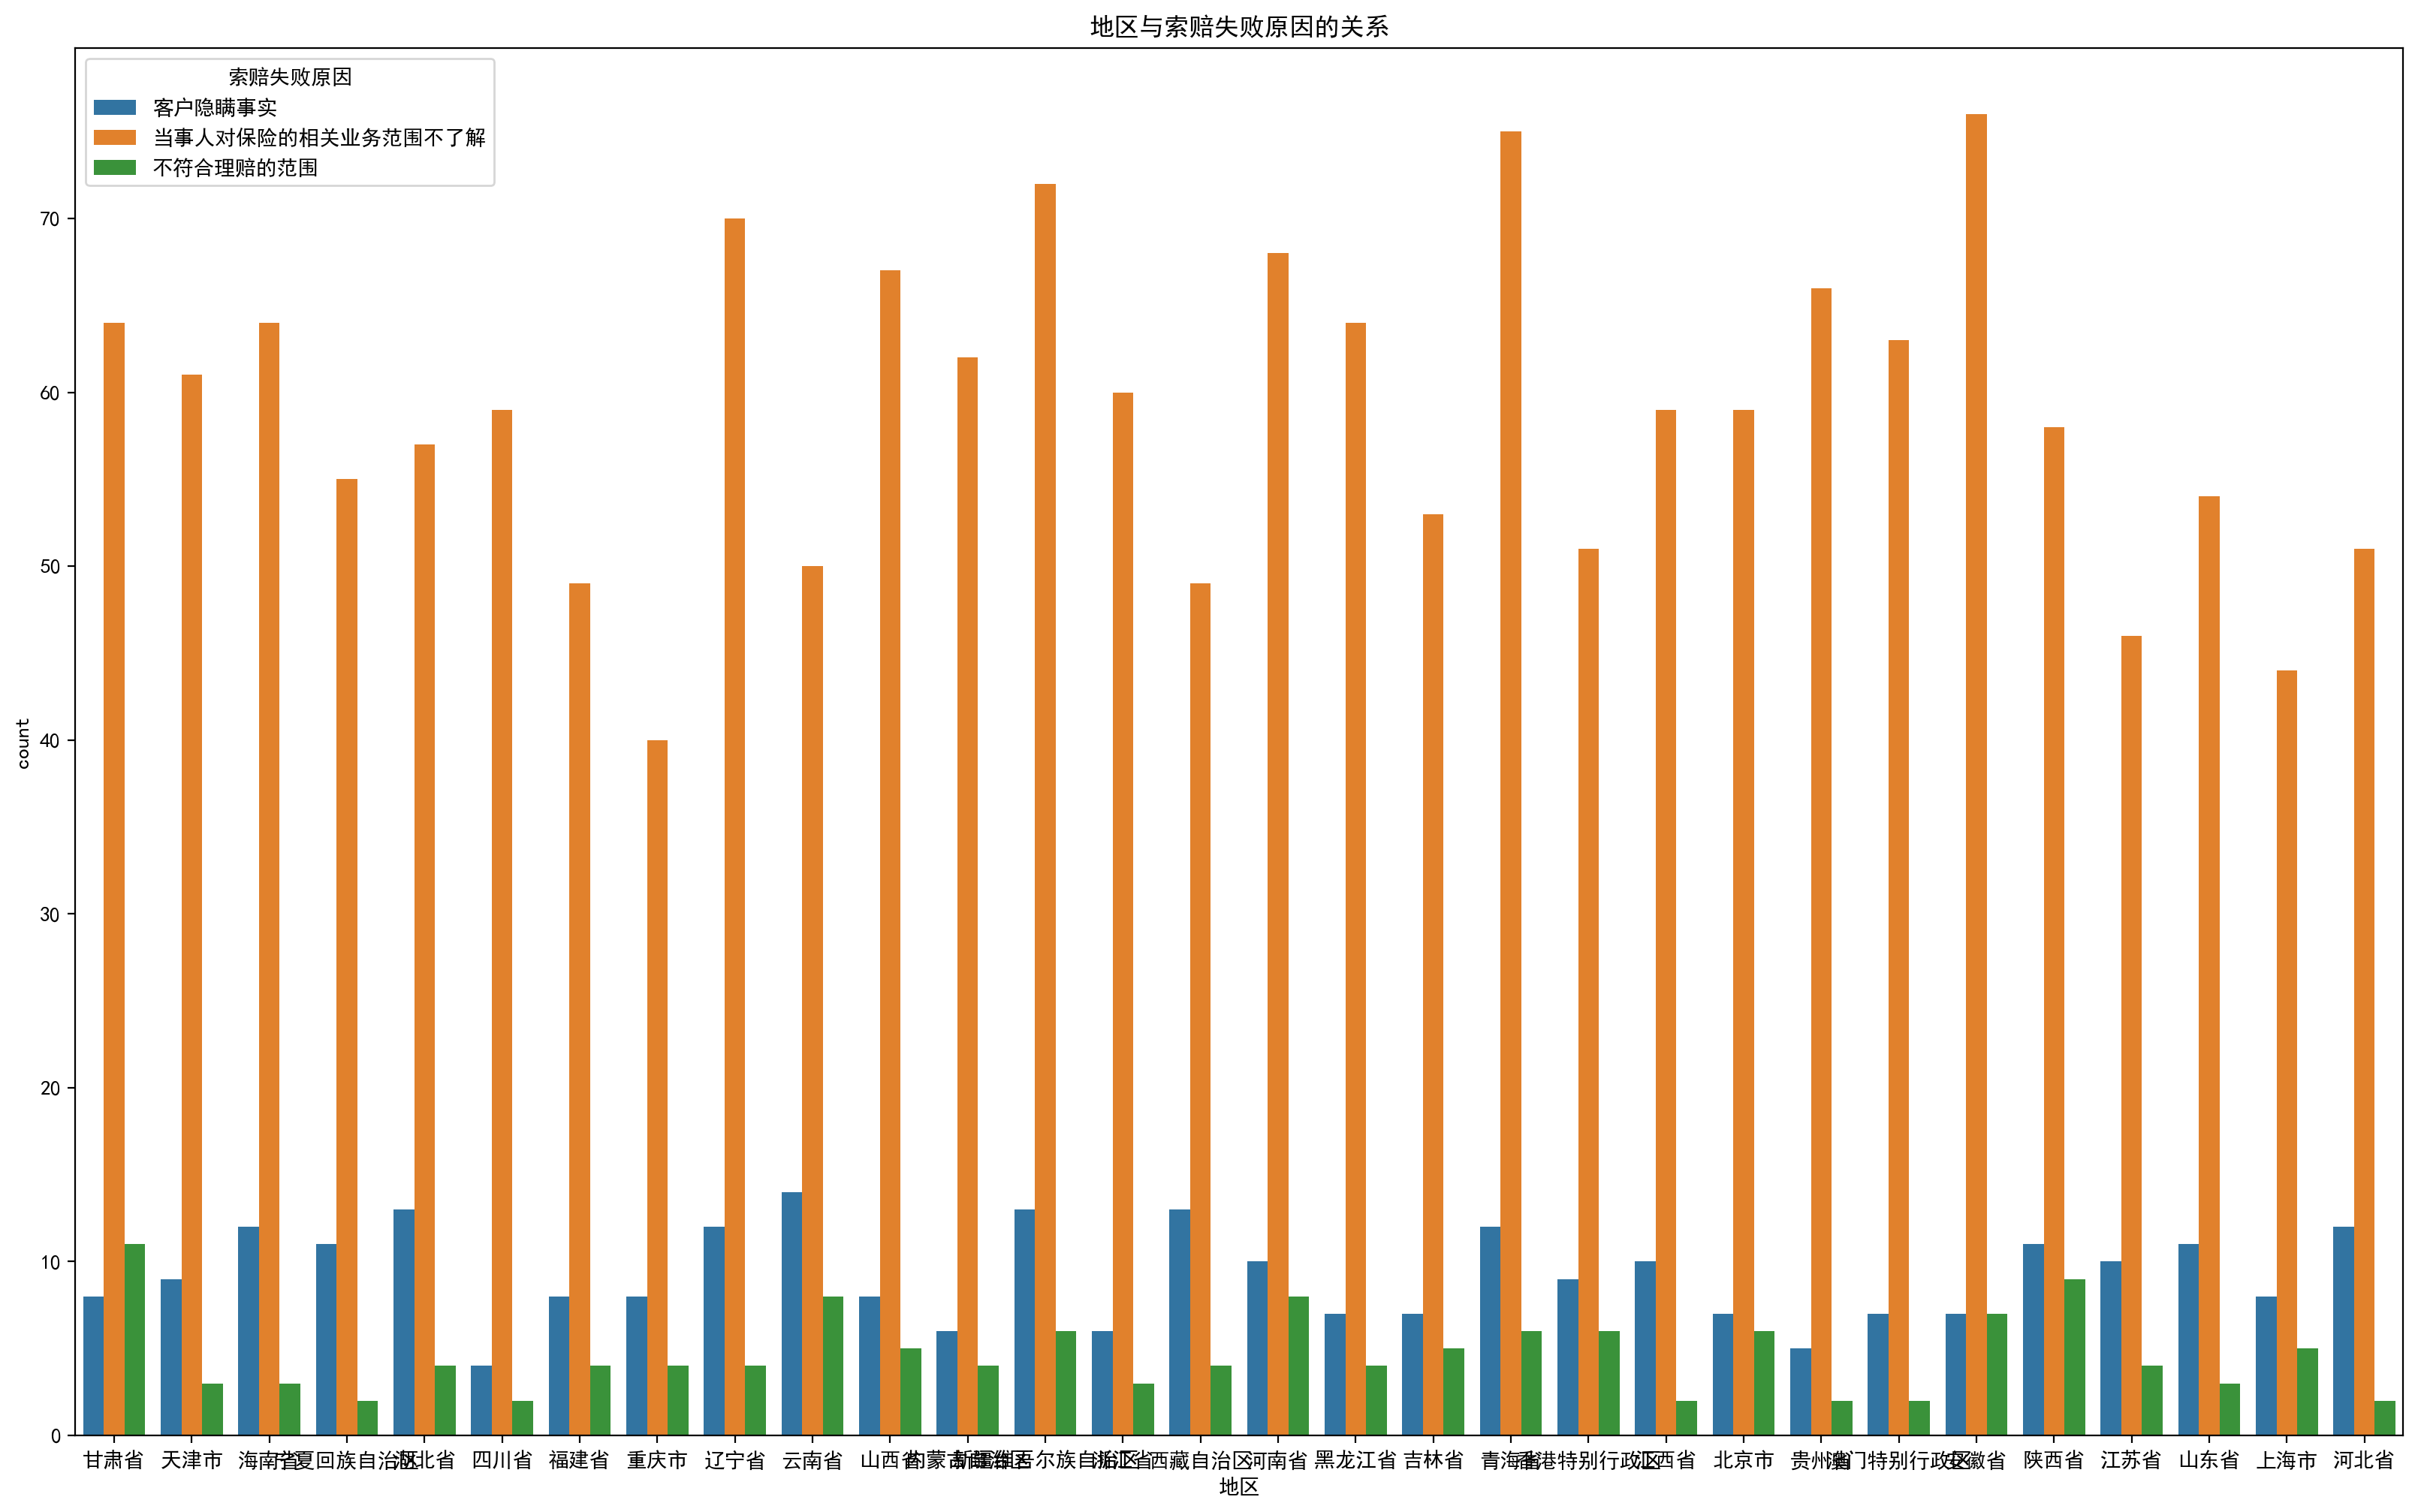

In [29]:
# 地区与索赔失败原因之间的关系
plt.figure(figsize=(20,12))
sns.countplot(x='地区', hue='索赔失败原因', data=dh_bxlp)
plt.title('地区与索赔失败原因的关系')
plt.show()

In [ ]:
# 年/月收入与索赔失败原因之间的关系
plt.figure(figsize=(10,6))
sns.boxplot(x='年/月收入', y='索赔失败原因', data=dh_bxlp)
plt.title('年/月收入与索赔失败原因的关系')
plt.show()

# 身体状态与索赔失败原因之间的关系
plt.figure(figsize=(10,6))
sns.countplot(x='身体状态', hue='索赔失败原因', data=dh_bxlp)
plt.title('身体状态与索赔失败原因的关系')
plt.show()

# 年龄与索赔失败原因之间的关系
plt.figure(figsize=(10,6))
sns.boxplot(x='年龄', y='索赔失败原因', data=dh_bxlp)
plt.title('年龄与索赔失败原因的关系')
plt.show()

# 保险种类与索赔失败原因之间的关系
plt.figure(figsize=(10,6))
sns.countplot(x='保险种类', hue='索赔失败原因', data=dh_bxlp)
plt.title('保险种类与索赔失败原因的关系')
plt.show()

# 保险赔付费与索赔失败原因之间的关系
plt.figure(figsize=(10,6))
sns.boxplot(x='保险赔付费', y='索赔失败原因', data=dh_bxlp)
plt.title('保险赔付费与索赔失败原因的关系')
plt.show()